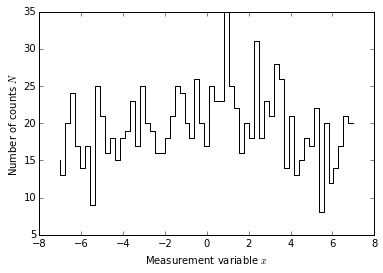

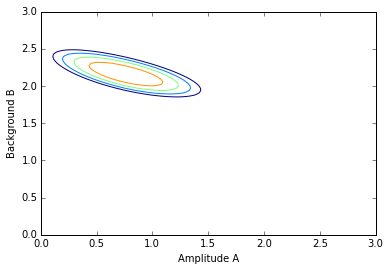

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import random as rm

%matplotlib inline
def sAmp(dataBins,max_counts):
    dataBinsLen=dataBins*4
    x0 = 0.
    w = 5/2.35
    #dataBins=7
    #max_counts=100.

    N = 15
    res = np.zeros(dataBinsLen)

    A=1;B=2
    xk= np.linspace(x0-dataBins/2,x0+dataBins/2,dataBinsLen)

    for i in xrange(N):
        D=A*np.exp( -( ( (xk-x0)**2.)/(2*(w**2) ) ) )+B
        n0=max_counts/(A+B)
        D*=n0
        #plt.bar(xk,D)
        #plt.show()

    for i in xrange(dataBinsLen):
        res[i]=np.random.poisson(D[i],1)

    #print res
    #plt.bar(xk,res, width=1)
    plt.step(xk,res,color='k')
    plt.xlabel(r'Measurement variable $x$')
    plt.ylabel('Number of counts $N$')
    plt.show()
    ###########################################################
    num=100
    arange = np.linspace(0,3,num)
    brange = np.linspace(0,3,num)
    Arange, Brange = np.meshgrid(arange,brange)
    l = np.zeros(shape=(num,num))

    d = np.zeros(dataBinsLen)

    for i in xrange(num):
        for j in xrange(num):
            d=Arange[i,j]*np.exp( -1*( ( (xk-x0)**2.)/(2*(w**2) ) ) )+Brange[i,j]
            #print len(d),' ',len(res),i,' j: ',j
            n0=max_counts/(A+B)
            #print len(n0),' ',len(d)
            d*=n0
            if(sum(d)<=0):
                l[i,j]=0.
            else:
                l[i,j]=sum(res*np.log(d)-d)

    
    #print np.min(l),' ',np.max(l),' ',l
    max_prob=[.1,.3,.5,.7,.9]
    max_prob=np.array(max_prob)*np.max(l)
    #print max_prob,' ',np.max(l)

    levels=np.linspace(np.max(l)-5,np.max(l),5)
    plt.contour(Arange, Brange, l, levels)
    plt.xlabel('Amplitude A')
    plt.ylabel('Background B')
    #plt.colorbar()
    plt.show()
###########################################
sAmp(15,25)